In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dict_file = './results/test_results.npy'
# remove_keys = ['csense_t24_random-ddpg_ep_g1e2-original-914']

# dictionary = np.load(dict_file,allow_pickle='TRUE').item()
# for key in remove_keys:
#     if key in dictionary:
#         del dictionary[keys]
# np.save(dict_file,dictionary) 

In [3]:
train_results = np.load('./results/all_train_results.npy',allow_pickle='TRUE').item()
test_results = np.load('./results/all_test_results.npy',allow_pickle='TRUE').item()

In [4]:
# results = train_results
results = test_results

In [5]:
file = 'seedlist.dat'
with open(file) as f:
    seed_list = []
    for line in f: # read rest of lines
        seed_list.append([int(x) for x in line.split()][0])

In [6]:
experiment_list = list(results.keys())
location_list   = list(results[experiment_list[0]][seed_list[0]].keys())
year_list       = list(results[experiment_list[0]][seed_list[0]][location_list[0]].keys())

In [20]:
print(experiment_list)

['csense_t24_random-base_g0.997-n0.7', 'cenp_t24_random-base_g0.997-n0.7']
[382084, 959804, 880775, 707317, 638913, 160861, 468738, 814726, 792012, 752389]


In [12]:
# Add keys to dictionaries
for experiment in experiment_list:
    results[experiment]["minimum"] = {}
    results[experiment]["first_q"] = {}
    results[experiment]["average"] = {}
    results[experiment]["third_q"] = {}
    results[experiment]["maximum"] = {}
    for location in location_list:
        results[experiment]["minimum"][location] = {}
        results[experiment]["first_q"][location] = {}
        results[experiment]["average"][location] = {}
        results[experiment]["third_q"][location] = {}
        results[experiment]["maximum"][location] = {}
        for year in year_list:
            results[experiment]["minimum"][location][year] = {}
            results[experiment]["first_q"][location][year] = {}
            results[experiment]["average"][location][year] = {}
            results[experiment]["third_q"][location][year] = {}
            results[experiment]["maximum"][location][year] = {}
            


In [13]:
# get min, avg and max downtimes
for experiment in experiment_list:
    for location in location_list:
        for year in year_list:
            dummy = []
            for seed in seed_list:
                dummy.append(results[experiment][seed][location][year]['downtimes'])
            results[experiment]["minimum"][location][year]['downtimes'] = np.min(dummy)
            results[experiment]["first_q"][location][year]['downtimes'] = np.percentile(dummy, 25)
            results[experiment]["average"][location][year]['downtimes'] = np.mean(dummy)
            results[experiment]["third_q"][location][year]['downtimes'] = np.percentile(dummy, 75)
            results[experiment]["maximum"][location][year]['downtimes'] = np.max(dummy)

# get min, avg and max avg_sense_reward
for experiment in experiment_list:
    for location in location_list:
        for year in year_list:
            dummy = []
            for seed in seed_list:
                avgsnsrwd = results[experiment][seed][location][year]['sense_reward_log'].mean()
                results[experiment][seed][location][year]['avg_sense_reward'] = avgsnsrwd # add new entry
                dummy.append(avgsnsrwd)
            results[experiment]["minimum"][location][year]['avg_sense_reward'] = np.min(dummy)
            results[experiment]["first_q"][location][year]['avg_sense_reward'] = np.percentile(dummy, 25)
            results[experiment]["average"][location][year]['avg_sense_reward'] = np.mean(dummy)
            results[experiment]["third_q"][location][year]['avg_sense_reward'] = np.percentile(dummy, 75)
            results[experiment]["maximum"][location][year]['avg_sense_reward'] = np.max(dummy)

tokyo


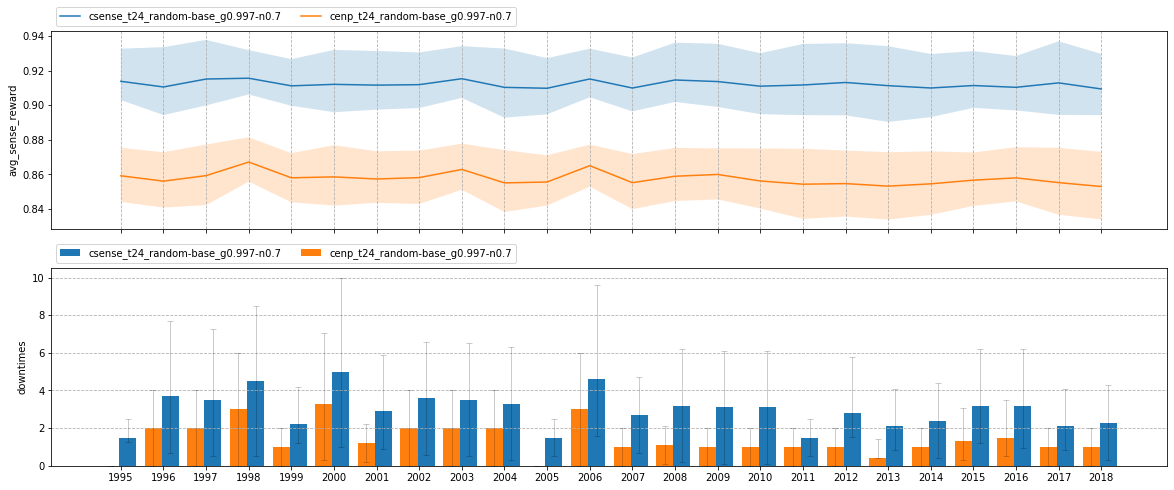

In [19]:
fig, axs = plt.subplots(nrows=2,
                        ncols=1,
                        figsize=[20,8],
                        sharex=True)

sense_reward_ax  = axs[0]
downtimes_ax = axs[1]

location = 'tokyo'
print(location)

# avg_sense_reward
for experiment in experiment_list:
    min_data = [results[experiment]["minimum"][location][year]['avg_sense_reward'] for year in year_list]
    qt1_data = [results[experiment]["first_q"][location][year]['avg_sense_reward'] for year in year_list]
    avg_data = [results[experiment]["average"][location][year]['avg_sense_reward'] for year in year_list]
    qt3_data = [results[experiment]["third_q"][location][year]['avg_sense_reward'] for year in year_list]
    max_data = [results[experiment]["maximum"][location][year]['avg_sense_reward'] for year in year_list]

    
    sense_reward_ax.fill_between(year_list, y1=qt1_data, y2=qt3_data, alpha=0.2)
    sense_reward_ax.plot(year_list, avg_data, label=experiment)
    
sense_reward_ax.set_ylabel('avg_sense_reward')    
sense_reward_ax.legend(loc="lower left",
                   ncol=3,
                   bbox_to_anchor=(0,1.0,1,1))
sense_reward_ax.grid(which='major', axis='x', linestyle='--')

# Downtimes
for experiment in experiment_list:
    min_data = [results[experiment]["minimum"][location][year]['downtimes'] for year in year_list]
    qt1_data = [results[experiment]["first_q"][location][year]['downtimes'] for year in year_list]
    avg_data = [results[experiment]["average"][location][year]['downtimes'] for year in year_list]
    qt3_data = [results[experiment]["third_q"][location][year]['downtimes'] for year in year_list]
    max_data = [results[experiment]["maximum"][location][year]['downtimes'] for year in year_list]
    
    width = 0.8/len(experiment_list)  # the width of the bars 
    xroot = np.array(year_list) # label locations
    xoffset = 0.8/2 - experiment_list.index(experiment) 
    downtimes_ax.bar(xroot+xoffset*width, avg_data,width, yerr = [qt1_data,qt3_data], 
                     label=experiment,
                     error_kw=dict(ecolor='black', lw=1, capsize=3, capthick=1, alpha=0.2))
    
downtimes_ax.set_ylabel('downtimes')    
downtimes_ax.legend(loc="lower left",
                   ncol=3,
                   bbox_to_anchor=(0,1.0,1,1))
downtimes_ax.grid(which='major', axis='y', linestyle='--')
downtimes_ax.set_xticks(year_list);